In [40]:
import numpy as np
import pandas as pd

In [41]:
df = pd.read_csv("placement1.csv")
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [43]:
df.shape

(100, 4)

In [44]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [45]:
#df.drop('Unnamed: 0', axis=1)
df = df.iloc[:,1:]
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [46]:
import matplotlib.pyplot as plt

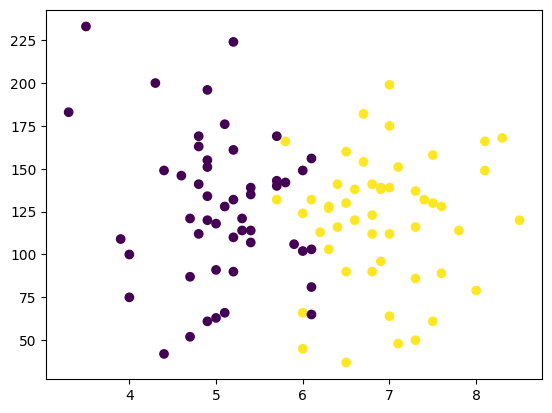

In [47]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [48]:
X = df.iloc[:, 0:2]
Y = df.iloc[:, -1]

In [49]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [50]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [80]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.1,
    random_state=42,
    stratify=Y
)

In [81]:
X_train

,cgpa,iq
15,5.1,176.0
38,6.5,160.0
90,7.3,86.0
91,7.5,158.0
37,8.1,149.0
...,...,...
73,4.9,61.0
21,7.1,151.0
34,4.8,163.0
41,5.4,114.0


In [82]:
Y_train

15    0
38    1
90    1
91    1
37    1
     ..
73    0
21    1
34    0
41    0
13    1
Name: placement, Length: 90, dtype: int64

In [83]:
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.76274927,  1.3473248 ],
       [ 0.43858083,  0.94860969],
       [ 1.12505517, -0.89544768],
       [ 1.29667376,  0.8987703 ],
       [ 1.81152951,  0.67449306],
       [-0.76274927, -1.39384156],
       [-1.79246078, -0.32229471],
       [-0.50532139, -0.3721341 ],
       [ 0.61019942,  0.79909153],
       [-0.67693998, -0.29737502],
       [ 1.38248305,  0.15117948],
       [ 0.52439012,  0.40037642],
       [-1.10598644, -1.74271728],
       [ 0.26696224,  0.15117948],
       [-0.24789351,  0.25085825],
       [ 0.69600871,  0.4751355 ],
       [-0.84855856, -0.09801746],
       [ 1.72572022, -1.06988554],
       [ 0.00953437,  0.0515007 ],
       [-0.93436786,  1.84571868],
       [ 0.18115295, -0.22261593],
       [ 0.781818  , -0.64625074],
       [ 0.35277154,  0.4751355 ],
       [-1.70665149, -1.16956431],
       [ 0.09534366, -1.41876125],
       [-0.16208422,  1.09812786],
       [ 2.15476669, -0.04817808],
       [-1.70665149, -0.54657196],
       [-1.10598644,

In [86]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.00953437, -1.39384156],
       [-0.93436786,  0.82401122],
       [ 1.21086447,  0.25085825],
       [ 0.86762729,  1.92047776],
       [-0.93436786, -0.04817808],
       [-0.24789351,  1.17288694],
       [ 0.781818  ,  0.42529611],
       [ 0.43858083,  0.20101887],
       [-0.50532139,  0.32561734],
       [-0.50532139,  0.42529611]])

In [87]:
from sklearn.linear_model import LogisticRegression

In [88]:
clf = LogisticRegression()

In [89]:
clf.fit(X_train,Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [90]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 0, 0])

In [91]:
Y_test

45    1
76    0
3     1
26    1
22    0
84    0
60    1
57    1
49    0
12    0
Name: placement, dtype: int64

In [92]:
from sklearn.metrics import accuracy_score

In [93]:
accuracy_score(Y_test,y_pred)

0.9

In [94]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

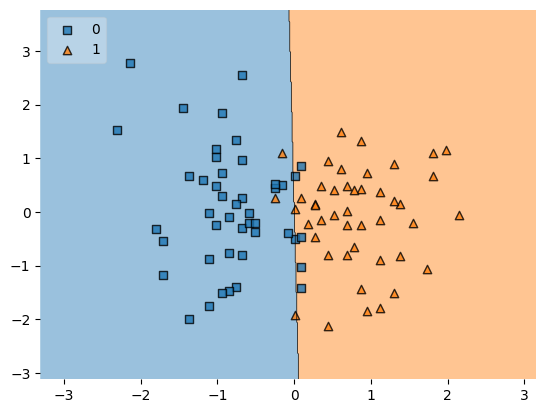

In [95]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2) 